,Fraction,Return,Standard deviation
0,0.0,0.090,0.230
1,0.1,0.096,0.214
2,0.2,0.102,0.204
3,0.3,0.108,0.199
4,0.4,0.114,0.202
5,0.5,0.120,0.211
6,0.6,0.126,0.225
7,0.7,0.132,0.244
8,0.8,0.138,0.267
9,0.9,0.144,0.292


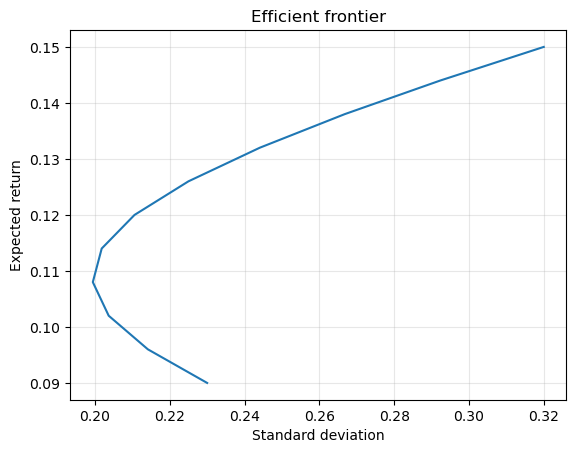

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

r_S, r_B = 0.15, 0.09

s_S, s_B = 0.32, 0.23

rho = 0.15

r_f = 0.055

increments = np.arange(0, 1.1, 0.1)

return_array = np.zeros(len(increments))
std_array = np.zeros(len(increments))
sharpe_array = np.zeros(len(increments))

for i, inc in enumerate(increments):
    return_array[i] = inc * r_S + (1 - inc) * r_B
    std_array[i] = np.sqrt(inc**2 * s_S**2 + (1 - inc)**2 * s_B**2 + 2 * inc * (1 - inc) * rho * s_S * s_B)
    sharpe_array[i] = (return_array[i] - r_f) / std_array[i]

table = pd.DataFrame({'Fraction':increments, 'Return': return_array, 'Standard deviation': std_array}).round(3)

fig, ax = plt.subplots()
ax.plot(std_array, return_array)
ax.set_xlabel('Standard deviation')
ax.set_ylabel('Expected return')
ax.set_title('Efficient frontier')
plt.grid(alpha=0.3)

display(table)

table.to_csv('efficient_frontier.csv', index=False)

fig.savefig('efficient_frontier.png', dpi=300)

,Fraction,Return,Standard deviation,Sharpe ratio
0,0.0,0.090,0.230,0.152
1,0.1,0.096,0.214,0.191
2,0.2,0.102,0.204,0.231
3,0.3,0.108,0.199,0.266
4,0.4,0.114,0.202,0.292
5,0.5,0.120,0.211,0.309
6,0.6,0.126,0.225,0.316
7,0.7,0.132,0.244,0.315
8,0.8,0.138,0.267,0.311
9,0.9,0.144,0.292,0.304


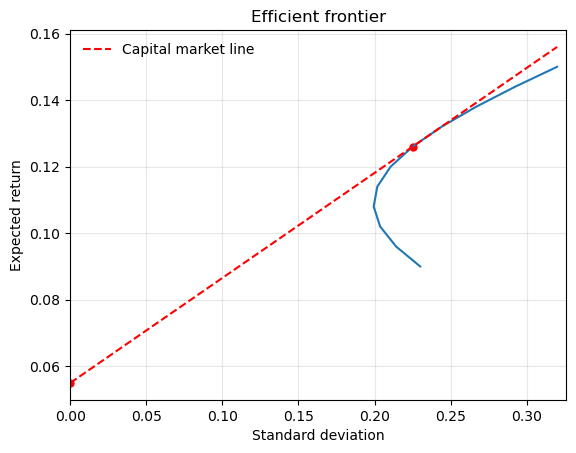

In [45]:
sharpe_array[3]

fig, ax = plt.subplots()
ax.plot(std_array, return_array)
ax.set_xlabel('Standard deviation')
ax.set_ylabel('Expected return')
ax.set_title('Efficient frontier')
ax.set_xlim(left=0)
ax.grid(alpha=0.3)

ax.scatter(0, r_f, marker='o', color='red', s=25)

x_line = np.linspace(0, std_array.max(), 100)
y_line = r_f + sharpe_array.max() * x_line

ax.plot(x_line, y_line, color='red', linestyle='--', label='Capital market line')
ax.scatter(std_array[sharpe_array == sharpe_array.max()], return_array[sharpe_array == sharpe_array.max()], marker='o', color='red', s=25)

ax.legend(frameon=False)

table = pd.DataFrame({'Fraction':increments, 'Return': return_array, 'Standard deviation': std_array, 'Sharpe ratio': sharpe_array}).round(3)

display(table)

table.to_csv('efficient_frontier_CML.csv', index=False)

fig.savefig('efficient_frontier_CML.png', dpi=300)

In [55]:
A=np.array([3.3, 0, 1.6])
B = np.array([0, 1.6, 3.3])

np.cov(A, B)

array([[ 2.72333333, -1.36166667],
       [-1.36166667,  2.72333333]])